# Continue working on the assignment. Will discuss solution @ 7:30pm IST

**Assignment Questions:**


**1. Handling Ordinal Data**
Q1: Convert the 'SpendingScore' column to ordinal values. The values 'Low', 'Medium', and 'High' should be represented as 0, 1, and 2 respectively.

Q2: After converting 'SpendingScore' to ordinal values, check the distribution of 'SpendingScore' and describe the frequency of each ordinal category.



**2. Handling Dates**


Q3: Convert the 'PurchaseDate' column to datetime format. If any invalid values exist, they should be coerced into NaT.

Q4: Extract the year and month from the 'PurchaseDate' column and create two new columns: 'Year' and 'Month'. What is the most frequent year and month of purchase?

Q5: Filter the data to include only purchases made in 2023. How many such records exist?

**3. Visualizations Using Seaborn**


Q6: Create a boxplot to visualize the distribution of 'MonthlyIncome' across different 'SpendingScore' categories.

Q7: Create a scatter plot to explore the relationship between 'Age' and 'MonthlyIncome'. Do you observe any trends? Describe them.

Q8: Use a heatmap to visualize the correlation between 'Age', 'SpendingScore', 'MonthlyIncome', and 'PurchaseDate'. Which variables are most correlated?

Q9: Create a countplot to show the distribution of purchases across different 'SpendingScore' categories. How are the categories distributed?

Q10: Create a pairplot to visualize the relationships between 'Age', 'MonthlyIncome', and 'SpendingScore'. Which variables have the strongest relationships with each other?

**4. Advanced Visualization**


Q11: Create a violin plot to visualize the distribution of 'MonthlyIncome' across 'SpendingScore'. What can you infer about the income distribution for each spending score?

Q12: Plot a line plot to show the number of purchases made each month in 2023. How do the purchases vary over the months?

Q13: Use a histogram to show the distribution of 'Age'. What is the range of ages, and what is the mode?

Q14: Create a bar plot to show the average 'MonthlyIncome' for each 'SpendingScore' category. What is the income trend across different spending categories?

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            50 non-null     int64 
 1   SpendingScore  50 non-null     object
 2   PurchaseDate   50 non-null     object
 3   MonthlyIncome  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [4]:
data.head()

,Age,SpendingScore,PurchaseDate,MonthlyIncome
0,36,Low,2023-04-20,4500
1,40,Medium,2023-05-16,3200
2,55,Low,2023-04-21,5500
3,33,High,2023-05-15,4700
4,30,Medium,2023-06-01,5100


In [5]:
#Q1: Convert the 'SpendingScore' column to ordinal values. The values 'Low', 'Medium', and 'High'
# should be represented as 0, 1, and 2 respectively.

In [7]:
mapping = {"Low": 0,
           "Medium": 1,
           "High":2
           }
data['SpendingScore_Encoded'] = data["SpendingScore"].map(mapping)

In [8]:
data.head()

,Age,SpendingScore,PurchaseDate,MonthlyIncome,SpendingScore_Encoded
0,36,Low,2023-04-20,4500,0
1,40,Medium,2023-05-16,3200,1
2,55,Low,2023-04-21,5500,0
3,33,High,2023-05-15,4700,2
4,30,Medium,2023-06-01,5100,1


In [ ]:
#Q2: After converting 'SpendingScore' to ordinal values, check the distribution of
#'SpendingScore' and describe the frequency of each ordinal category.

Text(0.5, 1.0, 'Distribution of Spending Score')

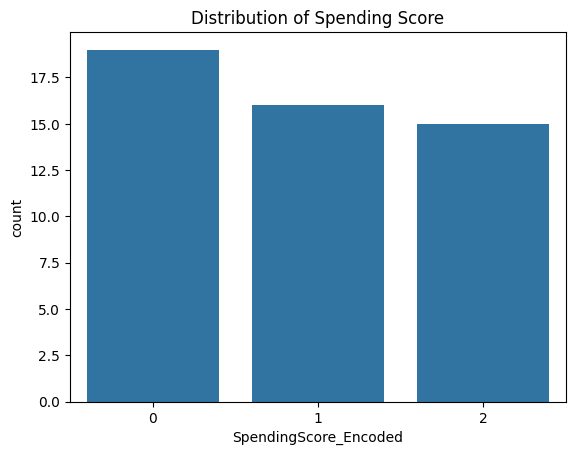

In [11]:
#Spending Score Encoded is Discrete Numerical ---- We have a defined range (0,1,2)

sns.countplot(x='SpendingScore_Encoded', data=data)
plt.title("Distribution of Spending Score")

In [15]:
#Q3: Convert the 'PurchaseDate' column to datetime format. If any invalid values exist, they should be coerced into NaT.

data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], errors='coerce')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Age                    50 non-null     int64         
 1   SpendingScore          50 non-null     object        
 2   PurchaseDate           50 non-null     datetime64[ns]
 3   MonthlyIncome          50 non-null     int64         
 4   SpendingScore_Encoded  50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.1+ KB


In [26]:
data.head()

,Age,SpendingScore,PurchaseDate,MonthlyIncome,SpendingScore_Encoded,Year,Month
0,36,Low,2023-04-20,4500,0,2023,4
1,40,Medium,2023-05-16,3200,1,2023,5
2,55,Low,2023-04-21,5500,0,2023,4
3,33,High,2023-05-15,4700,2,2023,5
4,30,Medium,2023-06-01,5100,1,2023,6


In [17]:
#Q4: Extract the year and month from the 'PurchaseDate' column and create two new columns: 'Year' and 'Month'.
# What is the most frequent year and month of purchase?

In [18]:
data['Year'] = data['PurchaseDate'].dt.year
data['Month'] = data['PurchaseDate'].dt.month

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Age                    50 non-null     int64         
 1   SpendingScore          50 non-null     object        
 2   PurchaseDate           50 non-null     datetime64[ns]
 3   MonthlyIncome          50 non-null     int64         
 4   SpendingScore_Encoded  50 non-null     int64         
 5   Year                   50 non-null     int32         
 6   Month                  50 non-null     int32         
dtypes: datetime64[ns](1), int32(2), int64(3), object(1)
memory usage: 2.5+ KB


In [20]:
# What is the most frequent year and month of purchase? (Mode)

print("Most frequent Year of purchase: ",data['Year'].mode()[0])
print("Most frequent Month of purchase: ",data['Month'].mode()[0])

Most frequent Year of purchase:  2023
Most frequent Month of purchase:  1


In [25]:
#Pandas Date Format
# For Month Range is 1(Jan) to 12(Dec)
# For day of the week 0(Monday) to 6

In [28]:
# Q5: Filter the data to include only purchases made in 2023. How many such records exist?

print(len(data[ data['Year'] == 2023 ]))
print(data[ data['Year'] == 2023 ].count())


50
Age                      50
SpendingScore            50
PurchaseDate             50
MonthlyIncome            50
SpendingScore_Encoded    50
Year                     50
Month                    50
dtype: int64


<Axes: xlabel='SpendingScore_Encoded', ylabel='MonthlyIncome'>

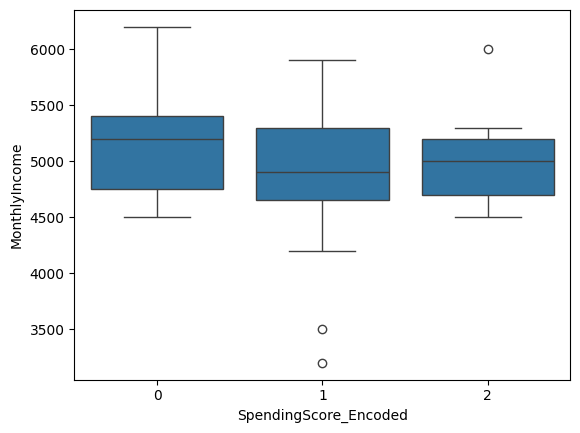

In [29]:
#Q6: Create a boxplot to visualize the distribution of 'MonthlyIncome' across different 'SpendingScore' categories.

sns.boxplot(x='SpendingScore_Encoded', y='MonthlyIncome', data=data)

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

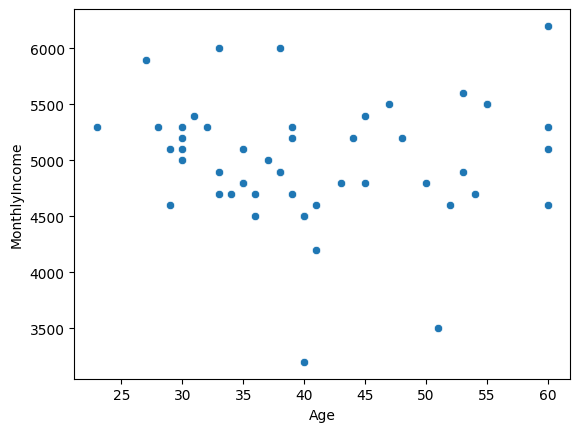

In [30]:
#Q7: Create a scatter plot to explore the relationship between 'Age' and 'MonthlyIncome'. Do you observe any trends? Describe them.

sns.scatterplot(data=data, x='Age', y='MonthlyIncome')

In [32]:
#Correlation (Linear Relationship) ---- -1 to 1
# If value near to 1 --- Positive Corr
# IF value near to -1 -- Negative corr
# if value near to 0 --- No corr
data['Age'].corr(data['MonthlyIncome'])

-0.02045820428550797

In [ ]:
#Q8: Use a heatmap to visualize the correlation between 'Age', 'SpendingScore', 'MonthlyIncome', and 'PurchaseDate'.
#Which variables are most correlated?

In [40]:
data[['Age','MonthlyIncome','SpendingScore_Encoded','PurchaseDate']].corr()

,Age,MonthlyIncome,SpendingScore_Encoded,PurchaseDate
Age,1.000000,-0.020458,-0.013106,-0.110094
MonthlyIncome,-0.020458,1.000000,-0.140015,-0.047824
SpendingScore_Encoded,-0.013106,-0.140015,1.000000,0.115380
PurchaseDate,-0.110094,-0.047824,0.115380,1.000000


<Axes: >

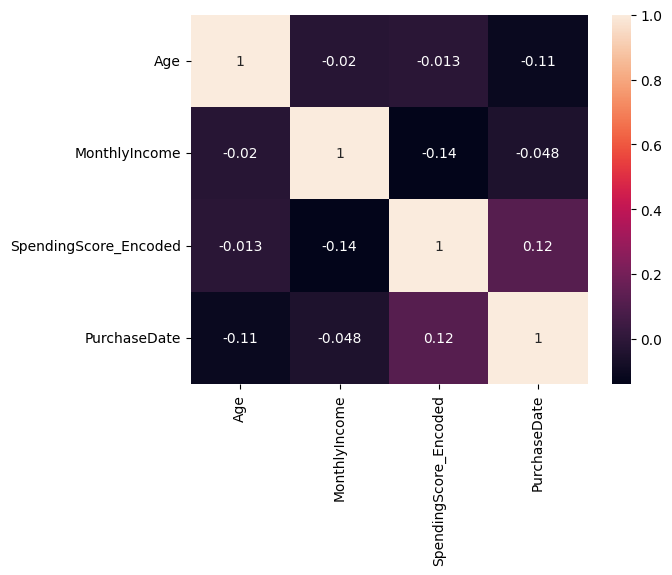

In [37]:
#Correlation Matrix
sns.heatmap(data[['Age','MonthlyIncome','SpendingScore_Encoded','PurchaseDate']].corr(), annot=True)

In [ ]:
#Q9: Create a countplot to show the distribution of purchases across different 'SpendingScore' categories. How are the categories distributed?

<Axes: xlabel='count', ylabel='SpendingScore'>

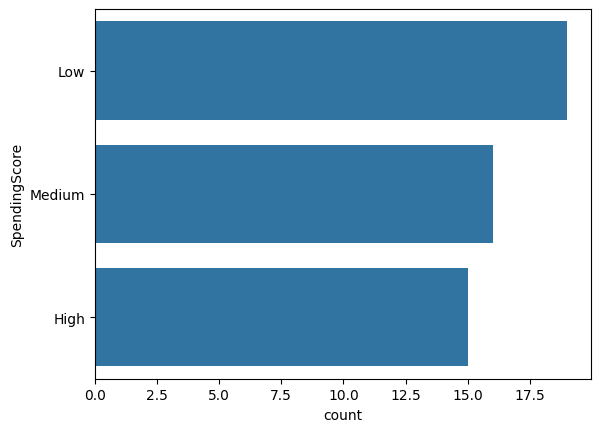

In [41]:
sns.countplot(data['SpendingScore'])

In [42]:
data['SpendingScore'].value_counts()

,count
SpendingScore,
Low,19
Medium,16
High,15


In [43]:
data['SpendingScore'].value_counts().index

Index(['Low', 'Medium', 'High'], dtype='object', name='SpendingScore')

Text(0.5, 1.0, 'Count')

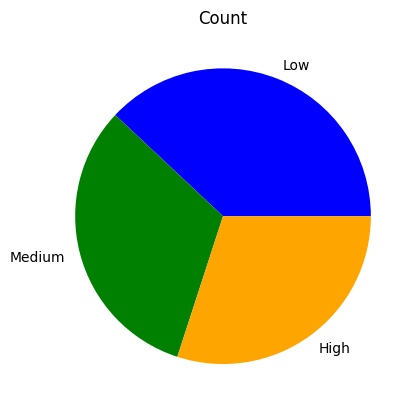

In [45]:
#Pie Chart ----- Prepare using matplotlib

extractCountsOfEachCategory = data['SpendingScore'].value_counts()

plt.pie(extractCountsOfEachCategory, labels=extractCountsOfEachCategory.index, colors=['blue','green','orange'])

plt.title("Count")

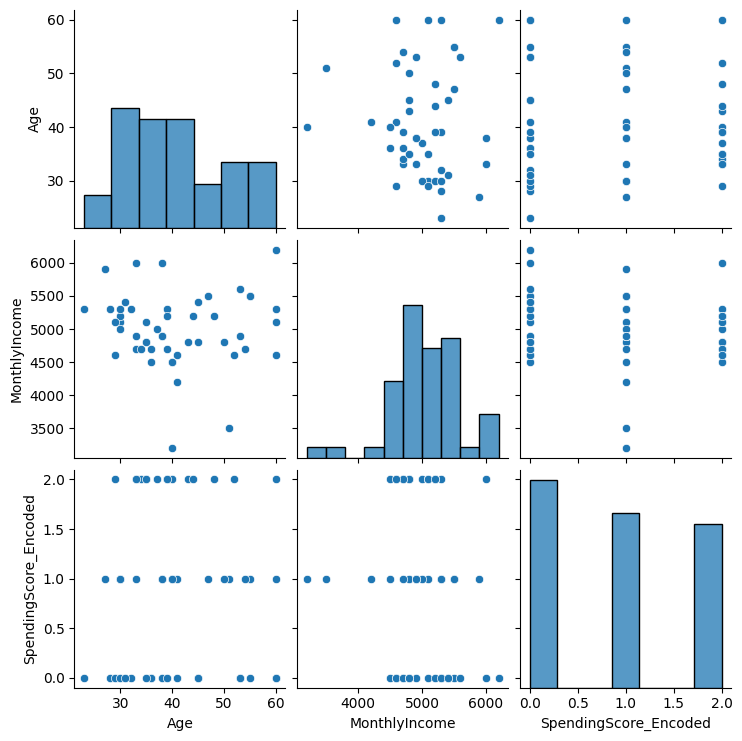

In [47]:
#Q10: Create a pairplot to visualize the relationships between 'Age', 'MonthlyIncome', and 'SpendingScore'.
#Which variables have the strongest relationships with each other?

sns.pairplot(data[['Age', 'MonthlyIncome', 'SpendingScore_Encoded']])

In [ ]:
#Q11: Create a violin plot to visualize the distribution of 'MonthlyIncome' across 'SpendingScore'.
#What can you infer about the income distribution for each spending score?

<Axes: xlabel='SpendingScore_Encoded', ylabel='MonthlyIncome'>

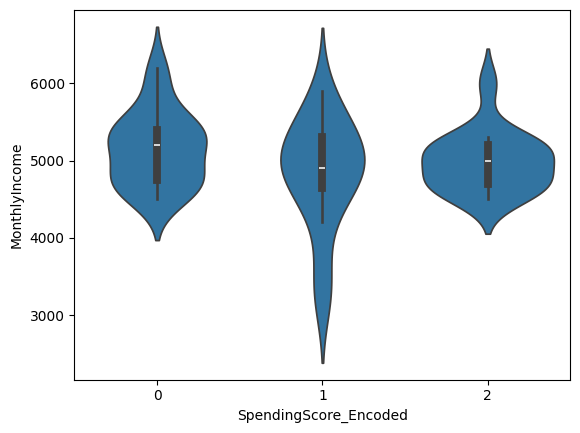

In [48]:
sns.violinplot(x='SpendingScore_Encoded', y='MonthlyIncome', data=data)

In [ ]:
#Q12: Plot a line plot to show the number of purchases made each month in 2023. How do the purchases vary over the months?

<Axes: xlabel='Month', ylabel='PurchaseDate'>

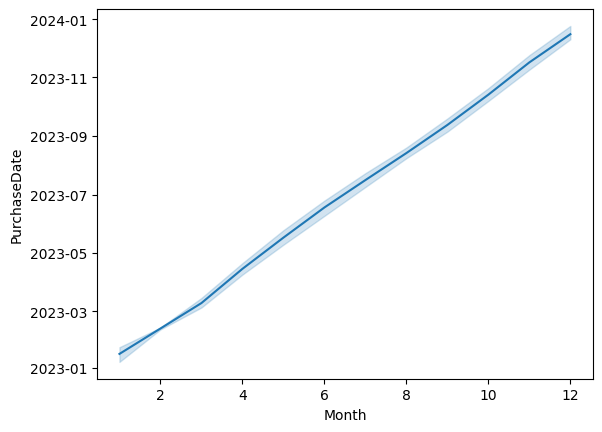

In [49]:
sns.lineplot(x=data['Month'],y=data['PurchaseDate'])

In [58]:
purchasesPerMonth = data['Month'].value_counts().sort_index()

In [59]:
purchasesPerMonth.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Month')

In [60]:
purchasesPerMonth.values

array([5, 2, 3, 4, 5, 5, 4, 5, 4, 5, 5, 3])

<Axes: xlabel='Month'>

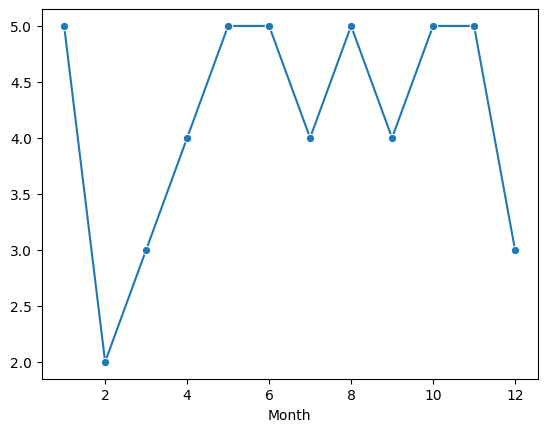

In [61]:
sns.lineplot(x=purchasesPerMonth.index, y=purchasesPerMonth.values, marker='o')

In [ ]:
#Q13: Use a histogram to show the distribution of 'Age'. What is the range of ages, and what is the mode?

<ipython-input-62-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

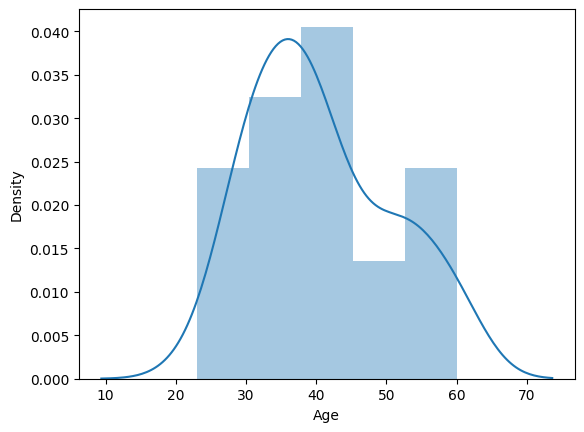

In [62]:
sns.distplot(data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

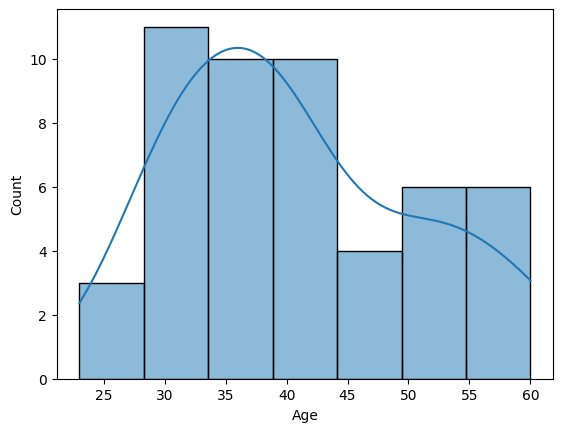

In [64]:
sns.histplot(data['Age'], kde=True)

In [66]:
data['Age'].mode()[0]

30

In [ ]:
#Q14: Create a bar plot to show the average 'MonthlyIncome' for each 'SpendingScore' category.
#What is the income trend across different spending categories?

<Axes: xlabel='SpendingScore', ylabel='MonthlyIncome'>

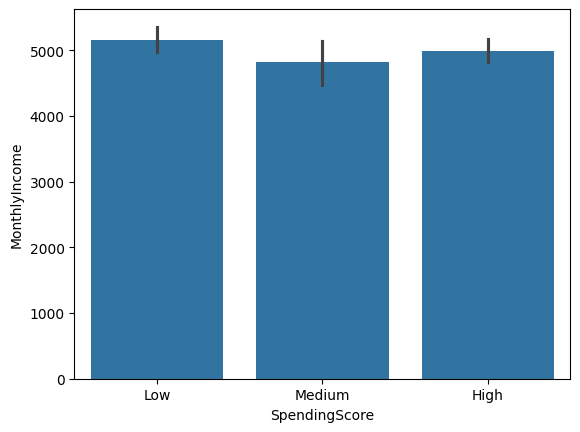

In [67]:
sns.barplot(data = data, x='SpendingScore', y='MonthlyIncome')